### Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [4]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
y_predict = model.predict(x)

In [6]:
model.classes_

array([0, 1])

In [7]:
model.intercept_

array([-1.04608067])

In [8]:
model.coef_

array([[0.51491375]])

In [9]:
y_predict_prob = model.predict_proba(x)

In [10]:
y_predict_prob

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [11]:
def predict(prob, threshold=0.7):
    if prob > threshold:
        return 1
    else:
        return 0

In [12]:
print(model.predict(x))

[0 0 0 1 1 1 1 1 1 1]


In [13]:
model.score(x, y)

0.9

In [14]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

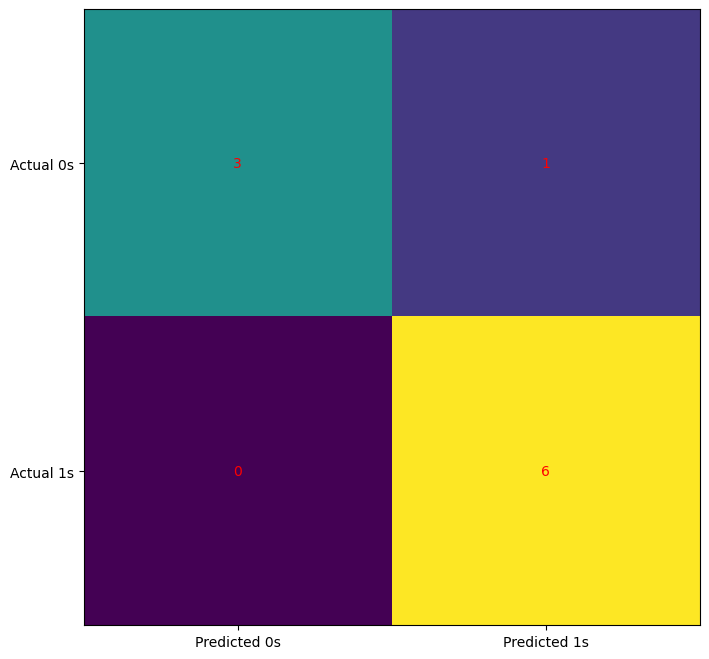

In [15]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [16]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [17]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [18]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [19]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [20]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [21]:
model.score(x, y)

1.0

In [22]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [23]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



#### 1. Import libraries

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### 2a. get data

In [25]:
x, y = load_digits(return_X_y=True)

#### 2b. split data

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### 2c. scale data

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

#### Create model and train 

In [28]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

#### evaluate model

In [29]:
x_test = scaler.transform(x_test)

In [30]:
y_pred = model.predict(x_test)

In [31]:
model.score(x_train, y_train)

0.964509394572025

In [32]:
model.score(x_test, y_test)

0.9416666666666667

In [33]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

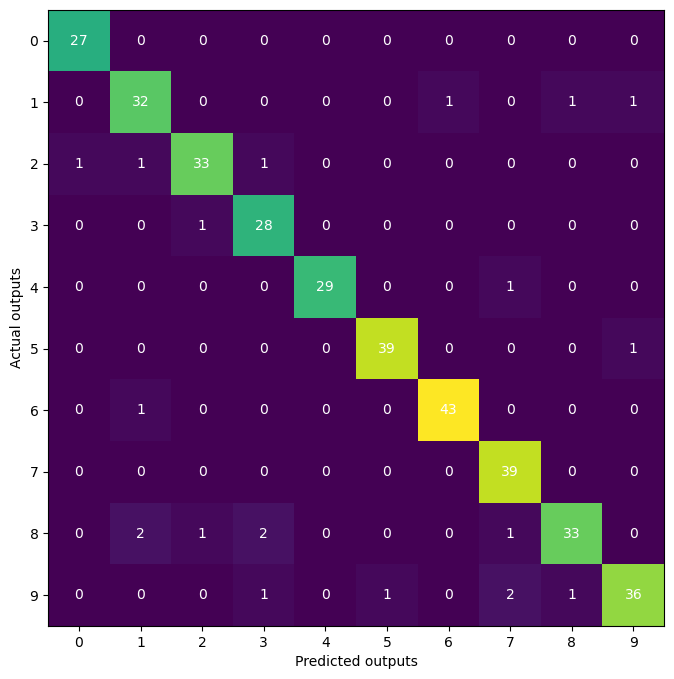

In [34]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### KNN

In [36]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [37]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [38]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [39]:
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [40]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted = model.predict([[0,2]]) # 0:Overcast, 2:Mild

print(predicted)

[1]


In [41]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

### Coba-coba Latihan

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
df_gender = pd.read_csv('datasets/gender_classification.csv')

In [45]:
df_gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [46]:
df_gender.shape

(5001, 8)

In [47]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [48]:
df_gender.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [49]:
df_gender.duplicated().sum()

1768

Normal karena variabel yang dihitung memiliki probabilitas yang tinggi untuk sama dengan lebih dari satu orang

In [50]:
gender_map = {'Male': 1, 'Female': 0}
df_gender['gender'] = df_gender['gender'].map(gender_map)

In [53]:
num_obs = len(df_gender)
num_males = len(df_gender[df_gender['gender'] == 1])
num_females = len(df_gender[df_gender['gender'] == 0])
print("Jumlah Male: {0} ({1:2.2f}%)".format(num_males, (num_males/num_obs)*100))
print("Jumlah Female: {0} ({1:2.2f}%)".format(num_females, (num_females/num_obs)*100))

Jumlah Male: 2500 (49.99%)
Jumlah Female: 2501 (50.01%)


In [54]:
X = df_gender.drop(['gender'],axis=1)

In [56]:
y = df_gender['gender']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [63]:
print("Training Male: {0} ({1:2.2f}%)".format(len(y_train[:] == 1), (len(y_train[y_train[:] == 1])/len(y_train))*100))
print("Training Female: {0} ({1:2.2f}%)".format(len(y_train[:] == 0), (len(y_train[y_train[:] == 0])/len(y_train))*100))
print("")
print("Testing Male: {0} ({1:2.2f}%)".format(len(y_test[:] == 1), (len(y_test[y_test[:] == 1])/len(y_test))*100))
print("Testing Female: {0} ({1:2.2f}%)".format(len(y_test[:] == 0), (len(y_test[y_test[:] == 0])/len(y_test))*100))

Training Male: 4000 (50.42%)
Training Female: 4000 (49.58%)

Testing Male: 1001 (48.25%)
Testing Female: 1001 (51.75%)


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [65]:
X_test = scaler.transform(X_test)

In [66]:
lr_model = LogisticRegression(solver='liblinear', C=0.05, random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.05, random_state=0, solver='liblinear')

In [67]:
y_pred = lr_model.predict(X_test)

In [68]:
lr_model.score(X_train, y_train)

0.97025

In [69]:
confusion_matrix(y_test, y_pred)

array([[503,  15],
       [ 19, 464]], dtype=int64)

In [92]:
def plot_confusion_matrix(data, labels):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='g')
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()

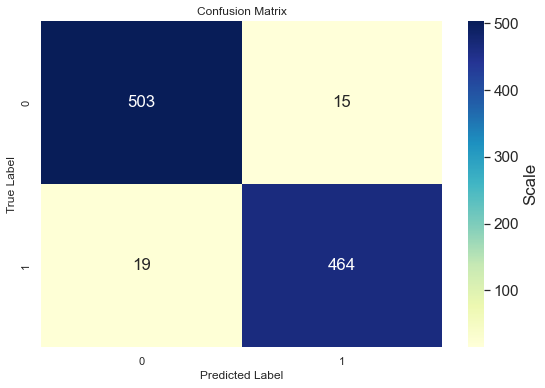

In [93]:
labels = [0, 1]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, labels)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       518
           1       0.97      0.96      0.96       483

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [95]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [96]:
y_pred_knn = knn_model.predict(X_test)

In [97]:
knn_model.score(X_train, y_train)

0.97625

In [98]:
confusion_matrix(y_test, y_pred_knn)

array([[504,  14],
       [ 23, 460]], dtype=int64)

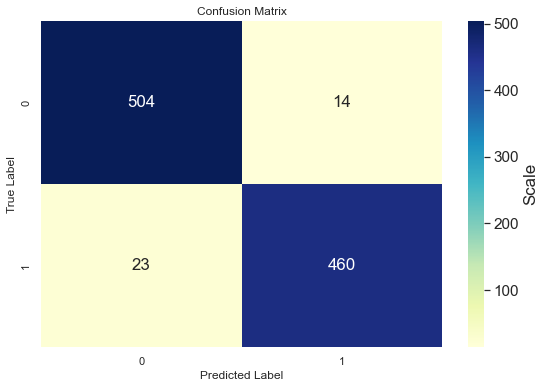

In [99]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plot_confusion_matrix(cm_knn, labels)

In [100]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       518
           1       0.97      0.95      0.96       483

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

